In [9]:
import pandas as pd

data_without_her = pd.read_csv('data/test_results_wo_her.csv')
data_with_her = pd.read_csv('data/test_results_her.csv')
data_chasing = pd.read_csv('data/test_results_chasing.csv')
data = pd.read_csv('data/test_results.csv')

In [10]:
# compare success rate
print('Success rate without HER: ', data_without_her['is_success'].mean())
print('Success rate with HER: ', data_with_her['is_success'].mean())
print('Success rate with Chasing: ', data_chasing['is_success'].mean())
print('Success rate: ', data['is_success'].mean())

Success rate without HER:  0.87
Success rate with HER:  0.97
Success rate with Chasing:  0.88
Success rate:  0.91


In [3]:
# compare average running time, only consider successful episodes
print('Average running time without HER: ', data_without_her[data_without_her['is_success'] == 1]['runtime'].mean())
print('Average running time with HER: ', data_with_her[data_with_her['is_success'] == 1]['runtime'].mean())
print('Average running time with Chasing: ', data_chasing[data_chasing['is_success'] == 1]['runtime'].mean())

Average running time without HER:  2.520311791321327
Average running time with HER:  2.7208692413015463
Average running time with Chasing:  2.5718988965858114


In [4]:
# compare average running time, consider all episodes
print('Average running time without HER: ', data_without_her['runtime'].mean())
print('Average running time with HER: ', data_with_her['runtime'].mean())
print('Average running time with Chasing: ', data_chasing['runtime'].mean())

Average running time without HER:  2.8344443035125733
Average running time with HER:  2.787319014072418
Average running time with Chasing:  2.857740190029144


In [5]:
import numpy as np

distances_without_her = data_without_her['distances']
distances_with_her = data_with_her['distances']
distances_chasing = data_chasing['distances']

# convert distances to numpy array
distances_without_her = np.array([np.array(eval(distances)) for distances in distances_without_her])[:][:10]
distances_with_her = np.array([np.array(eval(distances)) for distances in distances_with_her])[:][:10]
distances_chasing = np.array([np.array(eval(distances)) for distances in distances_chasing])[:][:10]

# calculate average distance
average_distances_without_her = np.mean(distances_without_her, axis=0)
average_distances_with_her = np.mean(distances_with_her, axis=0)
average_distances_chasing = np.mean(distances_chasing, axis=0)

# calculate difference between max and min
diff_without_her = np.max(distances_without_her, axis=0) - np.min(distances_without_her, axis=0)
diff_with_her = np.max(distances_with_her, axis=0) - np.min(distances_with_her, axis=0)
diff_chasing = np.max(distances_chasing, axis=0) - np.min(distances_chasing, axis=0)

# print average distance
print('Average distance without HER: ', average_distances_without_her)
print('Average distance with HER: ', average_distances_with_her)
print('Average distance with Chasing: ', average_distances_chasing)

# print difference between max and min
print('Difference between max and min without HER: ', diff_without_her)
print('Difference between max and min with HER: ', diff_with_her)
print('Difference between max and min with Chasing: ', diff_chasing)

Average distance without HER:  [0.10457906 0.09525241 0.07666688 0.0647891  0.05005107 0.04227489
 0.02222203 0.02048546 0.03788523 0.04484472 0.0617493  0.0782402
 0.09509939 0.11191057 0.12853484 0.14511747 0.16183819 0.1785572
 0.19517752 0.20880014]
Average distance with HER:  [0.10348175 0.0943956  0.07922264 0.07023889 0.05664935 0.04805436
 0.03715077 0.03779289 0.03819745 0.05403658 0.052166   0.05224415
 0.05690899 0.06299931 0.06299931 0.06299931 0.06299931 0.06299931
 0.06299931 0.06299931]
Average distance with Chasing:  [0.10141231 0.09759286 0.07922254 0.07060176 0.05347032 0.04206999
 0.02746033 0.03006433 0.03230149 0.05293059 0.05229484 0.05327966
 0.05366115 0.0598702  0.06079149 0.06175689 0.06284013 0.06402453
 0.06522219 0.0665118 ]
Difference between max and min without HER:  [0.01870554 0.02991341 0.01457147 0.02008319 0.01291513 0.02367505
 0.01319297 0.01427594 0.0912681  0.07277228 0.14953574 0.26479394
 0.38255284 0.50060452 0.61780648 0.73352004 0.84808998 0

In [6]:
# calculate change in distance by column
def calculate_change_in_distance(distances):
    change_in_distance = []
    for i in range(len(distances)):
        change_in_distance.append(distances[i][-1] - distances[i][0])
    return change_in_distance

distances_change_without_her = calculate_change_in_distance(distances_without_her)
distances_change_with_her = calculate_change_in_distance(distances_with_her)
distances_change_chasing = calculate_change_in_distance(distances_chasing)

print('Change in distance without HER: ', distances_change_without_her)
print('Change in distance with HER: ', distances_change_with_her)
print('Change in distance with Chasing: ', distances_change_chasing)

Change in distance without HER:  [-0.07655909, -0.046819559999999996, -0.08046837999999999, 0.026301460000000013, -0.069585885, 0.34128018, -0.062688523, -0.065642335, -0.012768440000000006, 1.08916139]
Change in distance with HER:  [-0.05260907, -0.039682955000000006, -0.009094813999999993, -0.07154949399999999, -0.009059134999999996, -0.0611394, -0.006512274999999998, -0.02315077, -0.068891976, -0.063134576]
Change in distance with Chasing:  [-0.03455891, -0.03636466000000001, -0.046657250000000004, -0.045376686, -0.030512445, -0.073428966, -0.03657321, -0.038670245000000006, 0.01228346999999999, -0.01914619499999999]


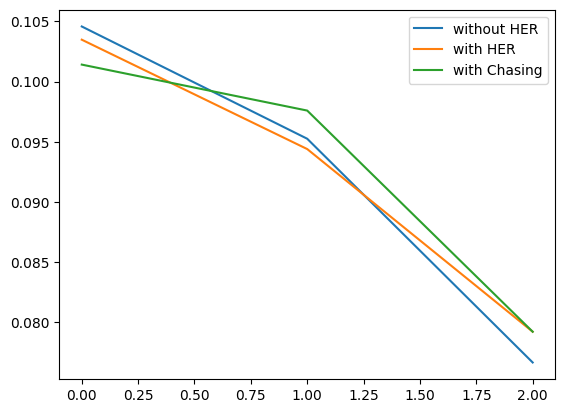

In [7]:
# plot distance change for the first 3 between without HER and with HER and Chasing
import matplotlib.pyplot as plt

plt.plot(average_distances_without_her[:3], label='without HER')
plt.plot(average_distances_with_her[:3], label='with HER')
plt.plot(average_distances_chasing[:3], label='with Chasing')
plt.legend()

In [8]:
import numpy as np

distances_without_her = data_without_her[data_without_her['is_success'] == 1]['distances']
distances_with_her = data_with_her[data_without_her['is_success'] == 1]['distances']
distances_chasing = data_chasing[data_without_her['is_success'] == 1]['distances']

# convert distances to numpy array
distances_without_her = np.array([np.array(eval(distances)) for distances in distances_without_her])[:][:10]
distances_with_her = np.array([np.array(eval(distances)) for distances in distances_with_her])[:][:10]
distances_chasing = np.array([np.array(eval(distances)) for distances in distances_chasing])[:][:10]


# calculate average distance by column
print('Average distance without HER: ', np.mean(distances_without_her, axis=1))
print('Average distance with HER: ', np.mean(distances_with_her, axis=1))
print('Average distance with Chasing: ', np.mean(distances_chasing, axis=1))

Average distance without HER:  [0.04191262 0.06333109 0.04221651 0.04465173 0.04616883 0.04899514
 0.08590548 0.04220108 0.04644976 0.05135347]
Average distance with HER:  [0.06028766 0.05898855 0.07713064 0.07748274 0.06823609 0.07230113
 0.04766677 0.06216418 0.04319655 0.06554582]
Average distance with Chasing:  [0.06023551 0.06379713 0.05761742 0.06085004 0.05711074 0.06100539
 0.062123   0.04003912 0.04412657 0.0806002 ]
